In [13]:
from gplearn.genetic import SymbolicTransformer
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge
from sklearn.utils import check_random_state
import matplotlib.pyplot as plt 
import numpy as np

### Example

In [9]:
rng = check_random_state(0)
boston = load_boston()
perm = rng.permutation(boston.target.size)
boston.data = boston.data[perm]
boston.target = boston.target[perm]

In [11]:
est = Ridge()
est.fit(boston.data[:300, :], boston.target[:300])
print(est.score(boston.data[300:, :], boston.target[300:]))

0.7593194530498838


In [21]:
?SymbolicTransformer

In [20]:
function_set = ['add', 'sub', 'mul', 'div',
                'sqrt', 'log', 'abs', 'neg', 'inv',
                'max', 'min']
gp = SymbolicTransformer(generations=20, population_size=2000,
                         hall_of_fame=100, n_components=10,
                         function_set=function_set,
                         parsimony_coefficient=0.0005,
                         max_samples=0.9, verbose=1,
                         random_state=0, n_jobs=1)
gp.fit(boston.data[:300, :], boston.target[:300])

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    11.04         0.339876        6         0.822502         0.675124     57.15s
   1     6.91         0.593562        7         0.836993         0.602468     54.57s
   2     5.07         0.730093        8          0.84063         0.704017     52.18s
   3     5.22         0.735525        5         0.847019         0.628351     48.77s
   4     6.24         0.734679       10         0.856612         0.565138     45.72s
   5     8.23         0.721433       18          0.85677         0.728095     44.31s
   6    10.20         0.717937       14         0.875233         0.619693     42.22s
   7    11.84         0.720667       14         0.875927         0.609363     40.26s
   8    12.56         0.733019       27         0.881705         0.390121  

SymbolicTransformer(const_range=(-1.0, 1.0), feature_names=None,
                    function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log',
                                  'abs', 'neg', 'inv', 'max', 'min'],
                    generations=20, hall_of_fame=100, init_depth=(2, 6),
                    init_method='half and half', low_memory=False,
                    max_samples=0.9, metric='pearson', n_components=10,
                    n_jobs=1, p_crossover=0.9, p_hoist_mutation=0.01,
                    p_point_mutation=0.01, p_point_replace=0.05,
                    p_subtree_mutation=0.01, parsimony_coefficient=0.0005,
                    population_size=2000, random_state=0, stopping_criteria=1.0,
                    tournament_size=20, verbose=1, warm_start=False)

In [25]:
gp_features = gp.transform(boston.data)
new_boston = np.hstack((boston.data, gp_features))

In [26]:
est = Ridge()
est.fit(new_boston[:300, :], boston.target[:300])
print(est.score(new_boston[300:, :], boston.target[300:]))

0.841837210518198


In [29]:
gp_features

array([[  5.16265743, 171.22102772, 230.54203613, ...,   1.39575891,
          2.56058638,   2.08953213],
       [  4.08245791, 130.7627541 , 176.54768303, ...,   1.09936912,
          1.84868836,   1.55759101],
       [  4.93456805, 152.24977774, 224.80032494, ...,   1.2039487 ,
          2.29423623,   1.90432145],
       ...,
       [  4.28060153, 128.39712723, 181.4387994 , ...,   1.0736375 ,
          2.02825767,   1.59885267],
       [  3.6712322 ,  95.60571688, 155.58279045, ...,   0.8000442 ,
          1.51066422,   1.21423576],
       [  3.68262853,  92.44798672, 141.83272532, ...,   0.83280975,
          1.70654429,   1.24176287]])

### Riemman

In [9]:
#%% Generate X data points
def genX(lmin=0,lmax=10,npoints=29):
    x1 = np.linspace(lmin,lmax,npoints)
    x2 = np.linspace(lmin,lmax,npoints)
    X1,X2 = np.meshgrid(x1,x2)
    x1m = np.ravel(X1.T)
    x2m = np.ravel(X2.T)
    Xm = np.c_[x1m,x2m]
    return Xm

In [14]:
#%% Test function 3
def testfunction3(X,noise=False):
    # Modelo: Y = sin(sqrt(x1^2+x2^2))/sqrt(x1^2+x2^2)+10
    X1 = X[:,0]
    X2 = X[:,1]
    if noise:
        Y = 10+np.sin(np.sqrt(X1**2+X2**2))/np.sqrt(X1**2+X2**2)+(0.5*np.random.rand(X.shape[0])-0.25)
    else:
        Y = 10+np.sin(np.sqrt(X1**2+X2**2))/np.sqrt(X1**2+X2**2)
    
    y = np.ravel(Y.T)
    return y

In [15]:
def square(x):
    return np.square(x)

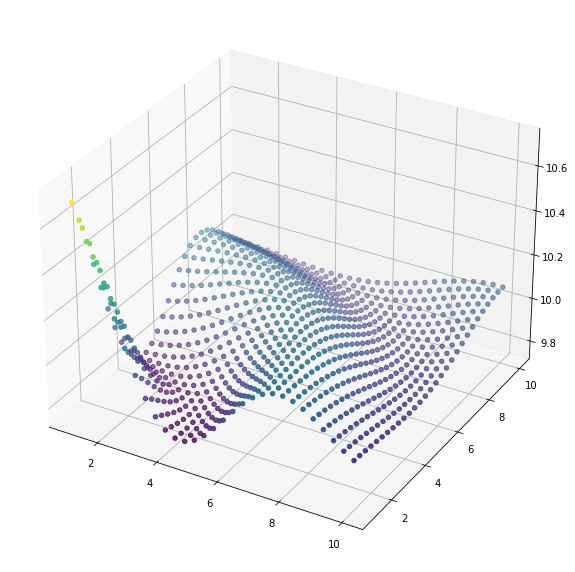

In [16]:
#%% Generacion de un hyperplano
#np.random.seed(1)
lmin = 1
lmax = 10
n = 29
Xm = genX(lmin=lmin,lmax=lmax,npoints=n)
y = testfunction3(X=Xm,noise=False)

nsamples=Xm.shape[0]

#%% Visualizar los datos
fig = plt.figure(figsize=(10, 20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Xm[:,0],Xm[:,1], y, c=y)
plt.show()

In [19]:
function_set = ['add', 'sub', 'mul', 'div',
                'sqrt', 'sin', 'abs', 'neg', 'inv',
                'log']
model = SymbolicTransformer(generations=20, population_size=5000,
                         hall_of_fame=100, n_components=10, 
                         init_method = "full", p_hoist_mutation = 0.05,
                         p_crossover = 0.7, p_subtree_mutation = 0.2,
                         function_set=function_set,
                         parsimony_coefficient=0.0001,
                         max_samples=0.9, verbose=1,
                         random_state=0)
model.fit(Xm, y)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    12.92        0.0655068        7         0.565601         0.663925      3.01m
   1    13.26          0.13047       10         0.626658         0.689621      2.65m
   2    16.87         0.210034       13         0.764498         0.625377      2.91m
   3    18.19         0.280362       12         0.754146         0.760199      2.64m
   4    18.74         0.340574       19         0.772061         0.737403      2.44m
   5    20.36         0.386627       40         0.810763         0.804484      2.53m
   6    20.56         0.396526       34         0.826614         0.642313      2.12m
   7    22.71         0.434062       23         0.880773         0.863795      2.03m
   8    27.86         0.480921       23         0.879308         0.880341  

SymbolicTransformer(const_range=(-1.0, 1.0), feature_names=None,
                    function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'sin',
                                  'abs', 'neg', 'inv', 'log'],
                    generations=20, hall_of_fame=100, init_depth=(2, 6),
                    init_method='full', low_memory=False, max_samples=0.9,
                    metric='pearson', n_components=10, n_jobs=1,
                    p_crossover=0.7, p_hoist_mutation=0.05,
                    p_point_mutation=0.01, p_point_replace=0.05,
                    p_subtree_mutation=0.2, parsimony_coefficient=0.0001,
                    population_size=5000, random_state=0, stopping_criteria=1.0,
                    tournament_size=20, verbose=1, warm_start=False)